# **Computer Vision: Application of Convolutional Neural Networks for Pneumonia Detection in Chest X-ray Images**

Name : Rendra Dwi Prasetyo

NIM  : 2602199960

This project aims to build a Convolutional Neural Network (CNN) model that can differentiate between images of normal lungs and lungs affected by pneumonia. This model uses a dataset of lung X-ray images to detect health conditions, focusing on binary classification (normal vs pneumonia). The final goal is to obtain the best model that helps in early detection of pneumonia automatically with a high level of accuracy

### **Path dataset**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path into dataset
data_dir = '/content/drive/MyDrive/MID_EXAM/DEEP_LEARNING/Dataset /parkinson_xray/parkinson_xray'

### Load dan resize image (64x264)

In [3]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
classes = os.listdir(data_dir)

# List for storing images and labels
images = []
labels = []
class_labels = {}

# Load data from folder and save to list
for label, class_dir in enumerate(classes):
    class_path = os.path.join(data_dir, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        image = load_img(img_path, target_size=(64, 264), color_mode='grayscale')  # RESIZE gambar jadi 64x264
        image = img_to_array(image)
        image = image / 255.0
        images.append(image)
        labels.append(label)

        class_labels[label] = class_dir

# Convert into array
images = np.array(images)
labels = np.array(labels)

Loop as many times as there is data in the dataset using the OS listdir and path functions. Images in the dataset are loaded using load_img with the resolution changed to 64x264. To reduce the burden borne by RAM when loading images

### Sample image

Class: PNEUMONIA


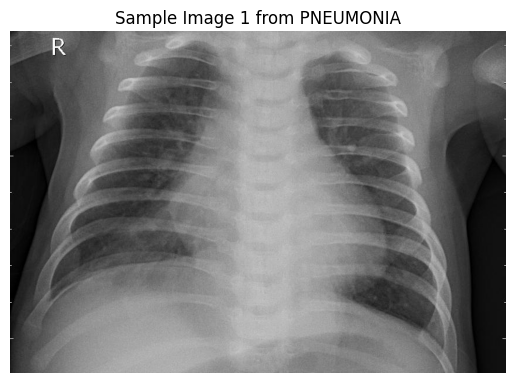

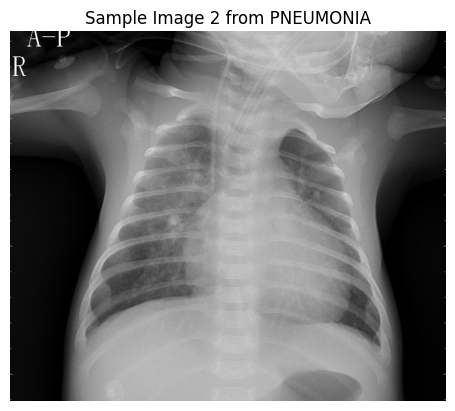

Class: NORMAL


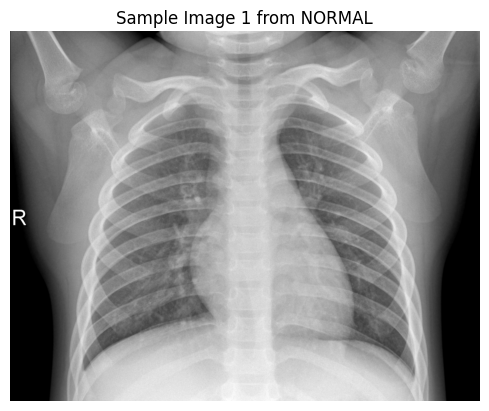

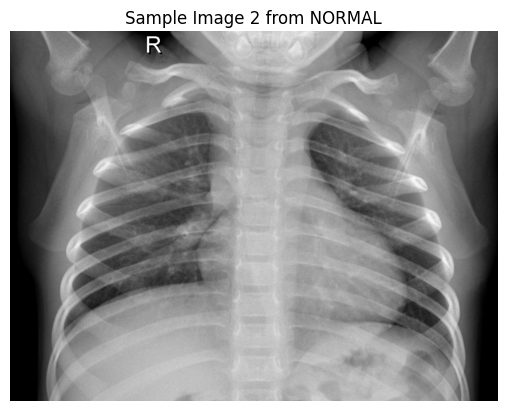

In [5]:
import matplotlib.pyplot as plt
import os
import cv2

# Function to display image samples
def show_sample_images(data_dir, num_samples=2):
  for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
      print(f"Class: {class_name}")
      for i, filename in enumerate(os.listdir(class_path)[:num_samples]):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR into RGB
        plt.imshow(img)
        plt.title(f"Sample Image {i+1} from {class_name}")
        plt.axis('off')
        plt.show()

show_sample_images(data_dir)

In [6]:
# Amount of data for labels 1 and 2

label_counts = {}
for label in labels:
  if label not in label_counts:
    label_counts[label] = 0
  label_counts[label] += 1

print("The amount of data for each label:")
for label, count in label_counts.items():
  print(f"Label {label}: {count} data")

The amount of data for each label:
Label 0: 3875 data
Label 1: 1341 data


In [ ]:
pip install imblearn

In [7]:
from imblearn.over_sampling import SMOTE

num_samples = images.shape[0]
image_height = images.shape[1]
image_width = images.shape[2]
num_channels = images.shape[3]

# Reshape into 2D:
images_reshaped = images.reshape(num_samples, -1)

# apply SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
images_reshaped, labels = oversample.fit_resample(images_reshaped, labels)

# Reshape back into 4D
images = images_reshaped.reshape(images_reshaped.shape[0], image_height, image_width, num_channels)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [8]:
from collections import Counter

print("Label class distribution after applying SMOTE:", Counter(labels))

Label class distribution after applying SMOTE: Counter({0: 3875, 1: 3875})


### Augmentasi

The augmentation process that I will carry out:
1. Rotation: Rotates the image by a certain angle.
2. Flip: Flips the image horizontally.
3. Magnification (zoom): Enlarge or reduce certain parts of the image.
4. Horizontal and vertical shifts
5. Changes in brightness/contrast.
6. shear transformation

In [9]:
# Augmentation for each set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# rescale for validation and testing data
#val_datagen = ImageDataGenerator()
#test_datagen = ImageDataGenerator()

In [10]:
images.shape

(7750, 64, 264, 1)

In [11]:
augmented_images = []
for i in range(5):  # To display 5 augmented images
    image = images[i].reshape((1, 64, 264, 1))  # Reshape to match ImageDataGenerator input format

    # Generates augmented images
    it = train_datagen.flow(image, batch_size=1)

    # Take one augmented image from generator
    augmented_images.append(next(it)[0].astype('float32'))

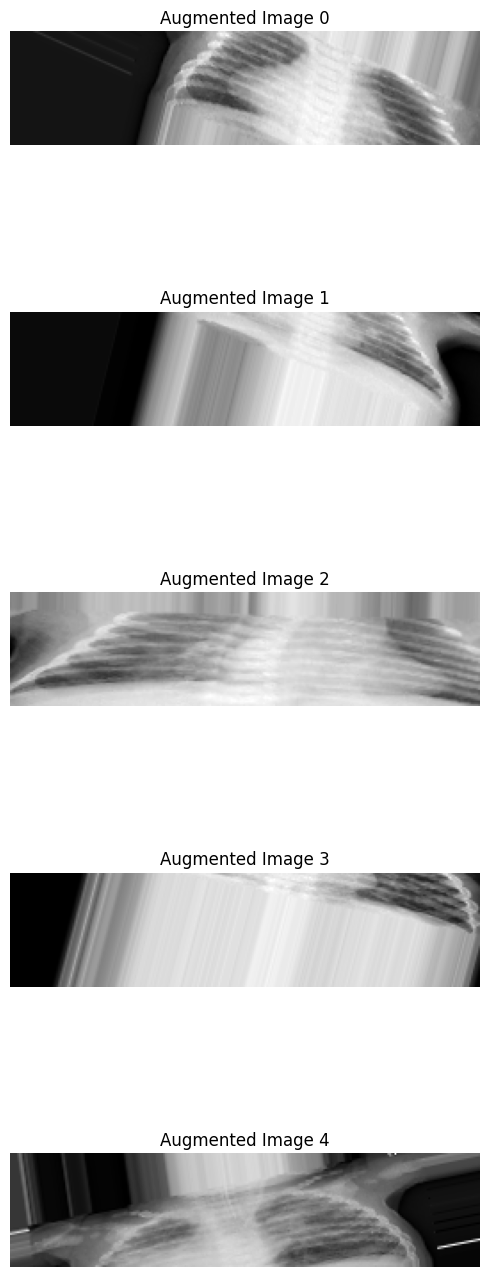

In [12]:
# Displays multiple augmented images with 1 column and 5 rows
fig, ax = plt.subplots(5, 1, figsize=(5, 15))

for i in range(5):
    ax[i].imshow(augmented_images[i], cmap='gray')
    ax[i].set_title('Augmented Image ' + str(i))
    ax[i].axis('off')

plt.tight_layout()
plt.show()

### Split dataset

In [13]:
# Split data into training data (70%), validation (20%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels) # 70% data training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

print(f"Number of data that is trained   : {len(X_train)}")
print(f"Number of data for Validation    : {len(X_val)}")
print(f"Number of Test data              : {len(X_test)}")


Number of data that is trained   : 5425
Number of data for Validation    : 1550
Number of Test data              : 775


In [14]:
X_train.shape


(5425, 64, 264, 1)

In [15]:
# Create a generator from a dataset that has been split
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)


This generator can load images incrementally, by only loading the required batch of images at each training iteration. This is very useful because the dataset I am using is quite large and there may not be enough if everything is run simultaneously in the memory capacity of the Google Collab that I am using.

# **Model CNN**

In [16]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam

# CNN Architecture
modell = Sequential([
    layers.InputLayer(input_shape=(64, 264, 1)), # The input layer adjusts the image data
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'), # First convolutional layer (6 filters)
    layers.AveragePooling2D(pool_size=(2, 2), strides=2), # First average pooling layer
    layers.Conv2D(64, (5, 5),padding='same', activation='relu'),  # Second convolutional layer with 16 filters
    layers.AveragePooling2D(pool_size=(2, 2), strides=2),  # Second average pooling layer
    layers.Flatten(), # Flatten layer to connect to fully connected layer
    layers.Dense(120, activation='relu'), # Dense layers 1
    layers.Dropout(0.5),
    layers.Dense(84, activation='relu'), # Dense layers 2
    #layers.Dense(10, activation='relu'), # Dense layers 3
    layers.Dense(1, activation='sigmoid') # Output layer
])

# Compile model
modell.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

modell.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 264, 32)         │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 32, 132, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 132, 64)         │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 16, 66, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67584)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       8,110,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,172,545 (31.18 MB)

 Trainable params: 8,172,545 (31.18 MB)

 Non-trainable params: 0 (0.00 B)

Justification of use for each parameter:

1. The first convolution layer aims to capture basic features of the image, such as edges and simple textures, using 6 filters and a larger kernel size (5x5). Padding "same" ensures the output size remains the same, while ReLU is used to overcome non-linearity problems.

2. The first pooling layer is designed to reduce feature dimensions and remove noise while retaining important information. Average pooling is used to produce a more stable output and focus on common features in the image.

3. The second convolution layer aims to capture more complex features after the basic features have been extracted by the first layer. The number of filters was increased to 16 to allow the model to detect more detailed patterns in images.

4. second pooling: continues the dimension reduction process

5. Flatten: this layer is needed to convert the 2D output from the pooling layer into a 1D vector

6. First dense (120 neurons): tasked with combining features extracted by convolution and pooling layers, with ReLU to maintain non-linearity.

7. Second dense (84 neurons): simplifies from the previous layer while retaining relevant information, using ReLU to capture important patterns.

8. Third dense (10 neurons): functions as a cover before the output layer and can capture the final feature combination for classification.

Dense output (1 neuron, sigmoid): since the task is binary classification, it uses 1 neuron with sigmoid to generate two class probabilities.

Adam, binary crossentropy, accuracy: Adam is chosen for efficient convergence, binary crossentropy is suitable for binary classification, and accuracy is used to evaluate model performance.

## Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Train model
history = modell.fit(
    train_generator,
    #X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val)
    #validation_data=val_generator,
    #callbacks=[early_stopping]
)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.7949 - loss: 0.4586 - val_accuracy: 0.8471 - val_loss: 0.3791
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7938 - loss: 0.4509 - val_accuracy: 0.8710 - val_loss: 0.3426
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.8035 - loss: 0.4277 - val_accuracy: 0.8884 - val_loss: 0.2980
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.8031 - loss: 0.4331 - val_accuracy: 0.8968 - val_loss: 0.2667
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.8063 - loss: 0.4158 - val_accuracy: 0.8284 - val_loss: 0.3605
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.8032 - loss: 0.4236 - val_accuracy: 0.8819 - val_loss: 0.2761
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.8251 - loss: 0.4022 - val_accuracy: 0.8968 - val_loss: 0.2920
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8229 - loss: 0.3899 - val_accu

## **Plotting train & validation lost**

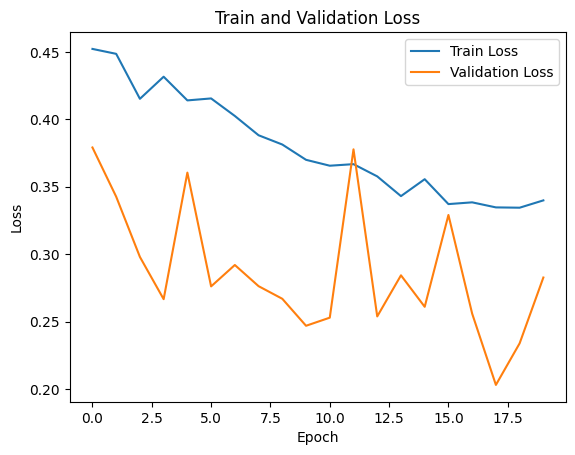

In [ ]:
import matplotlib.pyplot as plt

# Plot train loss dan val loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# **Accuracy, Precision, recall dan F1-Score**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Evaluation model
test_loss, test_accuracy = modell.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predict
preds = modell.predict(X_test)
preds = np.where(preds > 0.5, 1, 0).flatten()  # Konversi ke biner dan flatten agar sesuai dengan y_test


true_labels = y_test

# Evaluation metric : Precision, recall, dan F1 score
precision = precision_score(true_labels, preds)
recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 531ms/step - accuracy: 0.9072 - loss: 0.2365
Test Accuracy: 0.889032244682312
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 531ms/step
Precision: 0.9337175792507204
Recall: 0.8372093023255814
F1 Score: 0.8828337874659401


Confusion Matrix:
[[365  23]
 [ 63 324]]


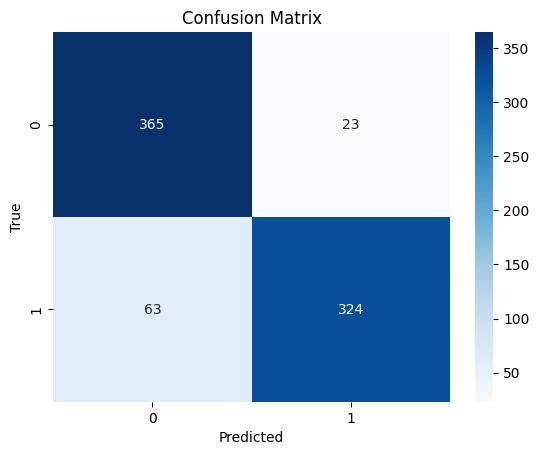

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, preds)

print("Confusion Matrix:")
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The number of 0 predicted 0 and 1 predicted 1 is large making this accuracy value quite good, although there are several predictions that are wrong from the true value